In [1]:
## inverting CO2 response
import numpy as np
import matplotlib.pyplot as plt
import IIRrational.v2
import scipy.signal as sig

In [2]:
## import CO2 step response data ##
data = np.loadtxt('/Users/daniel_vander-hyde/Documents/OneDrive - Syracuse University/CO2Y_point95W_step_minute_trend_october_18_2018.dat')

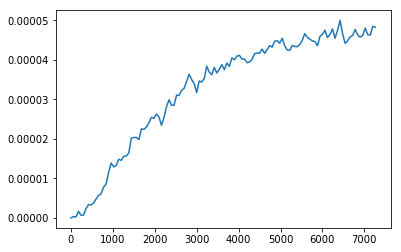

In [3]:
#OCTOBER 18th CO2Y step response data to a .95 W change in CO2Y
t = np.arange(0,len(data[:,0]),1)*60
HWSY = data[:,1]
HWSY = [HWSY[i] + abs(min(HWSY)) for i in range(0,len(HWSY))]
plt.plot(t,HWSY)
plt.show()

In [4]:
# condition
b, a = sig.butter(2, 0.028)
y2 = sig.filtfilt(b,a,HWSY)

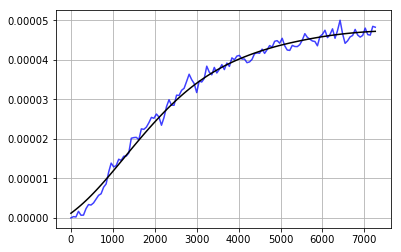

4.8281787e-05


In [5]:
plt.plot(t, HWSY, 'b', alpha=0.75)
plt.plot(t, y2, 'k')
plt.grid(True)
plt.show()
print(HWSY[-1])

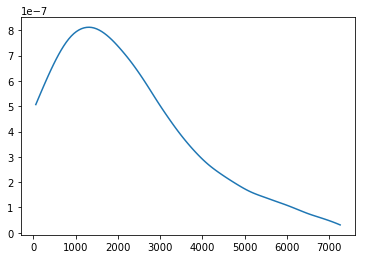

In [6]:
# len/power transfer function
time_plant = [lens/(.95) for lens in y2]
ir = (np.transpose(time_plant[1:]) - np.transpose(time_plant[:-1]))
t_new = np.transpose(t)
plt.plot(t_new[1:], ir)
plt.show()

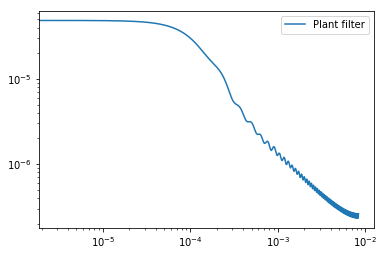

In [7]:
Fs = 1/(t[2]-t[1])
#print(Fs)

[F,H]=sig.freqz(ir,1, worN=3000,whole=False) 
plt.figure()
plt.loglog(F*Fs/(2*np.pi), abs(H), label='Plant filter')
plt.legend()
plt.show()

In [48]:
fit = IIRrational.v2.data2filter(
    data = H,
    F_Hz = F*Fs,
    order_initial=10
)

3W   0.00  Estimating SNR from sample variance with nearby points (SNR_est_width > 0).
           This technique work semi-OK, but could probably be much better..
           use the resulting fit to estimate the sample variance and generate
           improved SNR estimates, iterate.
3W   0.00  21 SNR<1 element(s) dropped (of 3000).
           Too many low SNR elements confuses the rational nonparametric fitter.
3W   0.01    The number of effective data points N=(ΣW^2)^2/(ΣW^4)=9.37e-01*len(W)
             [where W=SNR] is below the configured 'SNR_regularize_scale'=10,
             given the maximum SNR=396.86147513954114. Now Finding an SNR ceiling that balances
             the ratio with max SNR.


------------:SNR Fix Test:
------------:rational fitting:
4P   0.02    chebychev rational fit
3P   1.23    Initial Order: (Z=10, P=10, Z-P=0)
3P   1.83    Fastdrop Order: (Z=8, P=8, Z-P=0)
4P   3.98  mag fitting and phase patching
------------:sample variance (from magnitude):
3A   4.51    Weight Scaling determined:  8.320757880014515
3A   4.51    Weight Scaling Used  2.884572391189813
------------:Q-ranked order reduction:
4P   5.36    order reduced annealing
------------:selective order reduction:
5P   9.05    order reduced to 6, residuals=6.95e+01
2A  13.49  Baseline fit residuals: 6.95e+01, at order 6
------------:successive order reduction:
5P  17.66    order reduced to 6, residuals=7.96e+01
5P  19.37    order reduced to 6, residuals=8.05e+01
5P  20.24    order reduced to 4, residuals=9.83e+01
5P  20.81    order reduced to 3, residuals=9.99e+01
5P  21.14    order reduced to 3, residuals=6.73e+02
5P  21.59    order reduced to 2, residuals=6.02e+02
------------:investigations:
2I  2

In [49]:
print(fit.as_foton_str_ZPKsf())

ZPK([
  -0.019692763424372043 + 0.05487001623737972*i; -0.019692763424372043 - 0.05487001623737972*i;
  -0.026005678374212356 + 0.019874909742867774*i; -0.026005678374212356 - 0.019874909742867774*i;
  -0.0019321364727440202 + 0.0019008876105127538*i; -0.0019321364727440202 - 0.0019008876105127538*i;
],[
  -0.037020339362383387 + 0.06295593204701913*i; -0.037020339362383387 - 0.06295593204701913*i;
  -0.05066153763889531; -0.0015092602551357995;
  -0.0012971186136256346; -0.0006685175079912356;
], 6.404057804959946e-07, "f")


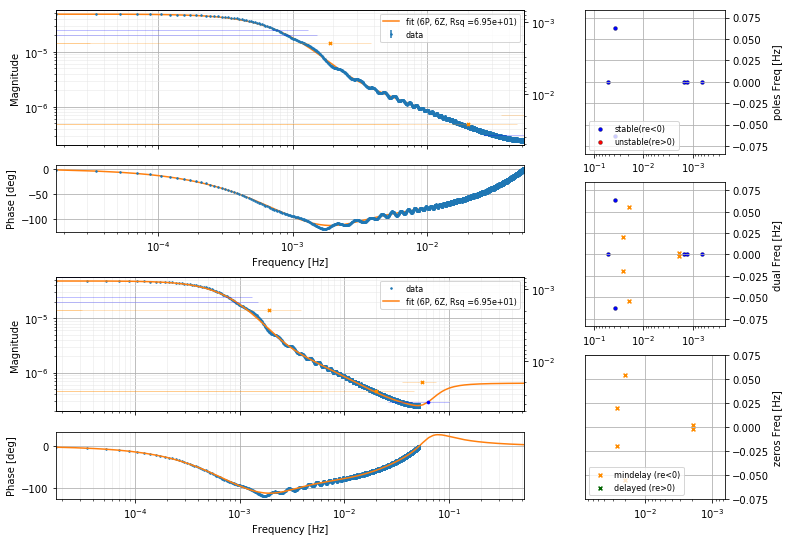

In [50]:
axB = fit.investigate_fit_plot()

In [48]:
b, a = sig.butter(2, 10e-4)

<bound method ResultsAid.as_scipy_signal_ZPKsw of <IIRrational.v2.results_aid_adv.ResultsAidAdv object at 0x116d6c128>>

In [ ]:
sig.lsim()